In [2]:
# pip install scikit_posthocs

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import scipy.stats as stats
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

C:\Users\lgh34\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:
import scikit_posthocs as sp

In [6]:
pd.set_option('float_format', '{:f}'.format)

In [7]:
plt.rc("font", family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)

In [8]:
df = pd.read_csv("pubg/tier_diff_squad.csv")

In [9]:
# df_log = df.copy()

In [10]:
# df_log.columns

In [11]:
# df_log['player_kills'] = df['player_kills'] + 1
# df_log['player_dmg'] = df['player_dmg'] + 1
# df_log['player_assists'] = df['player_assists'] + 1
# df_log['player_dbno'] = df['player_dbno'] + 1
# df_log['kda'] = df['kda'] + 1
# df_log['player_dist_walk'] = df['player_dist_walk'] + 1
# df_log['player_dist_ride'] = df['player_dist_ride'] + 1
# df_log['kill_dist'] = df['kill_dist'] + 1

In [12]:
# df_log['player_kills'] = df_log['player_kills'].apply(lambda x: np.log(x))
# df_log['player_dmg'] = df_log['player_dmg'].apply(lambda x: np.log(x))
# df_log['player_assists'] = df_log['player_assists'].apply(lambda x: np.log(x))
# df_log['player_dbno'] = df_log['player_dbno'].apply(lambda x: np.log(x))
# df_log['kda'] = df_log['kda'].apply(lambda x: np.log(x))
# df_log['player_dist_walk'] = df_log['player_dist_walk'].apply(lambda x: np.log(x))
# df_log['player_dist_ride'] = df_log['player_dist_ride'].apply(lambda x: np.log(x))
# df_log['kill_dist'] = df_log['kill_dist'].apply(lambda x: np.log(x))
# df_log['player_survive_time'] = df_log['player_survive_time'].apply(lambda x: np.log(x))

In [13]:
df.head()

,player_kills,player_dmg,player_assists,player_dbno,kda,player_dist_walk,player_dist_ride,kill_dist,player_survive_time,team_placement,num_of_match,tier
0,0.363636,64.136364,0.204545,0.363636,0.568182,1184.901109,1437.606416,3767.546726,855.850159,15.000000,44.000000,4.000000
1,0.888889,153.777778,0.333333,1.044444,1.222222,2343.452776,1043.089363,2825.714355,1081.692822,11.622222,23.844444,4.000000
2,0.437500,91.375000,0.250000,0.656250,0.687500,1278.862434,1689.491183,1466.603855,773.654438,16.187500,32.000000,4.000000
3,1.136364,140.250000,0.568182,0.818182,1.785714,987.429789,910.449309,2157.803493,709.818864,15.659091,44.000000,4.000000
4,0.500000,98.200000,0.300000,0.900000,0.800000,1671.741746,1077.786030,2742.036136,899.816600,12.200000,10.000000,2.000000


# player_kills

## 정규성

In [14]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_kills'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_kills'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_kills'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_kills'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_kills'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_kills'], dist='norm')
print( 'tier1', tier1[1][2], '\n', 'tier2', tier2[1][2], '\n', 'tier3', tier3[1][2], '\n',
      'tier4', tier4[1][2], '\n', 'tier5', tier5[1][2], '\n', 'tier6', tier6[1][2], '\n')

tier1 0.787 
 tier2 0.787 
 tier3 0.787 
 tier4 0.787 
 tier5 0.787 
 tier6 0.786 



In [15]:
# tier1 = stats.anderson(df_log.loc[df_log['tier'] == 1, 'player_kills'], dist='norm')
# tier2 = stats.anderson(df_log.loc[df_log['tier'] == 2, 'player_kills'], dist='norm')
# tier3 = stats.anderson(df_log.loc[df_log['tier'] == 3, 'player_kills'], dist='norm')
# tier4 = stats.anderson(df_log.loc[df_log['tier'] == 4, 'player_kills'], dist='norm')
# tier5 = stats.anderson(df_log.loc[df_log['tier'] == 5, 'player_kills'], dist='norm')
# tier6 = stats.anderson(df_log.loc[df_log['tier'] == 6, 'player_kills'], dist='norm')
# print( 'tier1', tier1[1][2], '\n', 'tier2', tier2[1][2], '\n', 'tier3', tier3[1][2], '\n',
#       'tier4', tier4[1][2], '\n', 'tier5', tier5[1][2], '\n', 'tier6', tier6[1][2], '\n')

## 등분산성

In [16]:
stats.levene(df.loc[df['tier'] == 1, 'player_kills'],
             df.loc[df['tier'] == 2, 'player_kills'],
             df.loc[df['tier'] == 3, 'player_kills'],
             df.loc[df['tier'] == 4, 'player_kills'],
             df.loc[df['tier'] == 5, 'player_kills'],
             df.loc[df['tier'] == 6, 'player_kills'])

LeveneResult(statistic=1367.0718989517989, pvalue=0.0)

In [17]:
# stats.levene(df_log.loc[df_log['tier'] == 1, 'player_kills'],
#              df_log.loc[df_log['tier'] == 2, 'player_kills'],
#              df_log.loc[df_log['tier'] == 3, 'player_kills'],
#              df_log.loc[df_log['tier'] == 4, 'player_kills'],
#              df_log.loc[df_log['tier'] == 5, 'player_kills'],
#              df_log.loc[df_log['tier'] == 6, 'player_kills'])

## anova

In [18]:
pg.welch_anova(dv = 'player_kills', between = 'tier', data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,tier,5,44793.068048,7721.262165,0.000000,0.034805


In [19]:
# pg.welch_anova(dv = 'player_kills', between = 'tier', data = df_log)

In [20]:
# plt.figure(figsize=(10,10))
# sns.kdeplot(data=df_log, x='player_kills', hue='tier')  #, shade=True

## kruskal

In [21]:
tier1 = df.loc[df['tier'] == 1, 'player_kills'] 
tier2 = df.loc[df['tier'] == 2, 'player_kills'] 
tier3 = df.loc[df['tier'] == 3, 'player_kills'] 
tier4 = df.loc[df['tier'] == 4, 'player_kills'] 
tier5 = df.loc[df['tier'] == 5, 'player_kills'] 
tier6 = df.loc[df['tier'] == 6, 'player_kills'] 
stats.kruskal(tier1, tier2, tier3, tier4, tier5, tier6)

KruskalResult(statistic=25617.369646176696, pvalue=0.0)

## 사후분석

In [22]:
sp.posthoc_conover(df, val_col ='player_kills',
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [23]:
df.columns

Index(['player_kills', 'player_dmg', 'player_assists', 'player_dbno', 'kda',
       'player_dist_walk', 'player_dist_ride', 'kill_dist',
       'player_survive_time', 'team_placement', 'num_of_match', 'tier'],
      dtype='object')

## plots

<AxesSubplot:xlabel='player_kills', ylabel='Density'>

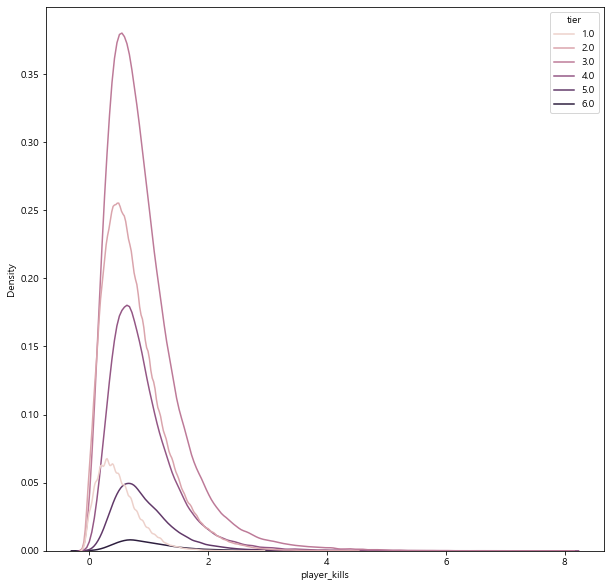

In [24]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=df, x='player_kills', hue='tier')  #, shade=True

In [25]:
df.head()

,player_kills,player_dmg,player_assists,player_dbno,kda,player_dist_walk,player_dist_ride,kill_dist,player_survive_time,team_placement,num_of_match,tier
0,0.363636,64.136364,0.204545,0.363636,0.568182,1184.901109,1437.606416,3767.546726,855.850159,15.000000,44.000000,4.000000
1,0.888889,153.777778,0.333333,1.044444,1.222222,2343.452776,1043.089363,2825.714355,1081.692822,11.622222,23.844444,4.000000
2,0.437500,91.375000,0.250000,0.656250,0.687500,1278.862434,1689.491183,1466.603855,773.654438,16.187500,32.000000,4.000000
3,1.136364,140.250000,0.568182,0.818182,1.785714,987.429789,910.449309,2157.803493,709.818864,15.659091,44.000000,4.000000
4,0.500000,98.200000,0.300000,0.900000,0.800000,1671.741746,1077.786030,2742.036136,899.816600,12.200000,10.000000,2.000000


<AxesSubplot:xlabel='tier', ylabel='player_kills'>

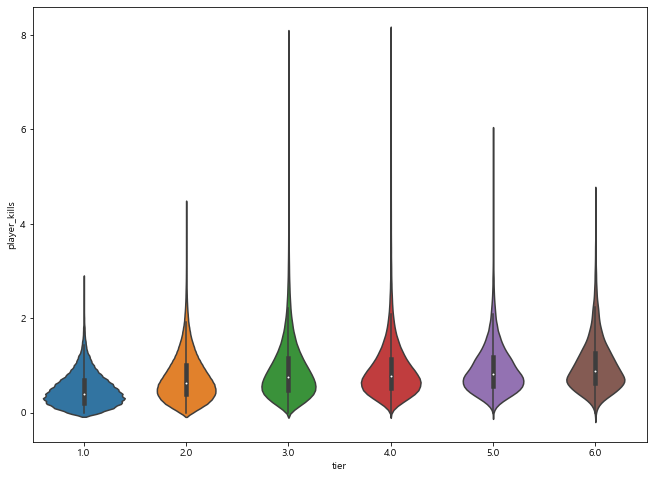

In [26]:
plt.figure(figsize=(11,8))
sns.violinplot(data=df, x='tier', y='player_kills')

# player_dmg

## 정규성

In [27]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_dmg'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_dmg'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_dmg'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_dmg'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_dmg'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_dmg'], dist='norm')
print( 'tier1', tier1[1][2], '\n', 'tier2', tier2[1][2], '\n', 'tier3', tier3[1][2], '\n',
      'tier4', tier4[1][2], '\n', 'tier5', tier5[1][2], '\n', 'tier6', tier6[1][2], '\n')

tier1 0.787 
 tier2 0.787 
 tier3 0.787 
 tier4 0.787 
 tier5 0.787 
 tier6 0.786 



## 등분산성

In [28]:
stats.levene(df.loc[df['tier'] == 1, 'player_dmg'],
             df.loc[df['tier'] == 2, 'player_dmg'],
             df.loc[df['tier'] == 3, 'player_dmg'],
             df.loc[df['tier'] == 4, 'player_dmg'],
             df.loc[df['tier'] == 5, 'player_dmg'],
             df.loc[df['tier'] == 6, 'player_dmg'])

LeveneResult(statistic=1395.1790939830714, pvalue=0.0)

## anova

In [29]:
pg.welch_anova(dv = 'player_dmg', between = 'tier', data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,tier,5,44731.531642,7654.959887,0.000000,0.035530


## kruskal

In [30]:
tier1 = df.loc[df['tier'] == 1, 'player_dmg'] 
tier2 = df.loc[df['tier'] == 2, 'player_dmg'] 
tier3 = df.loc[df['tier'] == 3, 'player_dmg'] 
tier4 = df.loc[df['tier'] == 4, 'player_dmg'] 
tier5 = df.loc[df['tier'] == 5, 'player_dmg'] 
tier6 = df.loc[df['tier'] == 6, 'player_dmg'] 
stats.kruskal(tier1, tier2, tier3, tier4, tier5, tier6)

KruskalResult(statistic=24669.661354188625, pvalue=0.0)

## 사후분석

In [31]:
sp.posthoc_conover(df, val_col ='player_dmg',
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## plots

<AxesSubplot:xlabel='player_dmg', ylabel='Density'>

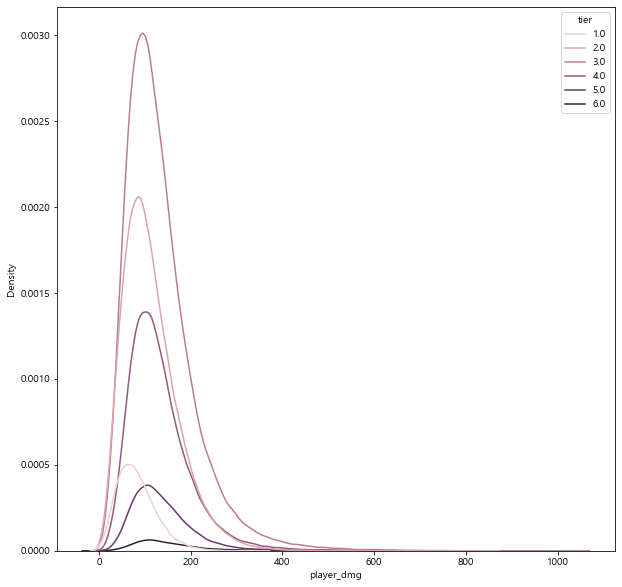

In [32]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=df, x='player_dmg', hue='tier')  #, shade=True

<AxesSubplot:xlabel='tier', ylabel='player_dmg'>

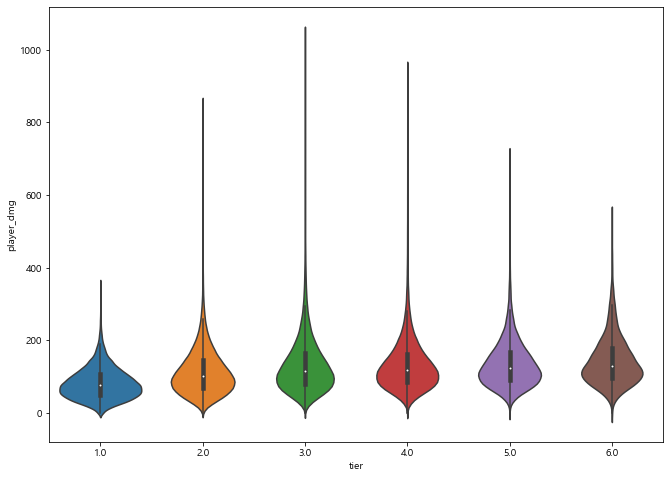

In [33]:
plt.figure(figsize=(11,8))
sns.violinplot(data=df, x='tier', y='player_dmg')

# player_assists

## 정규성

In [34]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_assists'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_assists'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_assists'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_assists'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_assists'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_assists'], dist='norm')
print( 'tier1', tier1[1][2], '\n', 'tier2', tier2[1][2], '\n', 'tier3', tier3[1][2], '\n',
      'tier4', tier4[1][2], '\n', 'tier5', tier5[1][2], '\n', 'tier6', tier6[1][2], '\n')

tier1 0.787 
 tier2 0.787 
 tier3 0.787 
 tier4 0.787 
 tier5 0.787 
 tier6 0.786 



## 등분산성

In [35]:
stats.levene(df.loc[df['tier'] == 1, 'player_assists'],
             df.loc[df['tier'] == 2, 'player_assists'],
             df.loc[df['tier'] == 3, 'player_assists'],
             df.loc[df['tier'] == 4, 'player_assists'],
             df.loc[df['tier'] == 5, 'player_assists'],
             df.loc[df['tier'] == 6, 'player_assists'])

LeveneResult(statistic=1701.7331643758544, pvalue=0.0)

## anova

In [36]:
pg.welch_anova(dv = 'player_assists', between = 'tier', data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,tier,5,44745.392579,4845.724320,0.000000,0.029140


## kruskal

In [37]:
tier1 = df.loc[df['tier'] == 1, 'player_assists'] 
tier2 = df.loc[df['tier'] == 2, 'player_assists'] 
tier3 = df.loc[df['tier'] == 3, 'player_assists'] 
tier4 = df.loc[df['tier'] == 4, 'player_assists'] 
tier5 = df.loc[df['tier'] == 5, 'player_assists'] 
tier6 = df.loc[df['tier'] == 6, 'player_assists'] 
stats.kruskal(tier1, tier2, tier3, tier4, tier5, tier6)

KruskalResult(statistic=21745.16048054949, pvalue=0.0)

## 사후분석

In [38]:
sp.posthoc_conover(df, val_col ='player_kills',
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## plots

<AxesSubplot:xlabel='player_assists', ylabel='Density'>

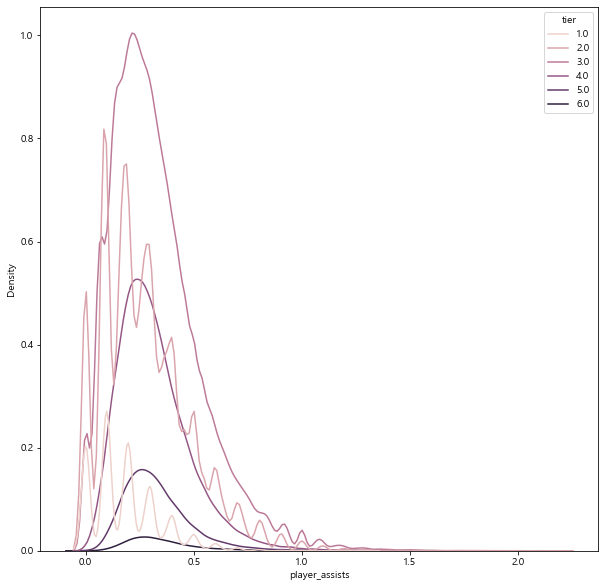

In [39]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=df, x='player_assists', hue='tier')  #, shade=True

<AxesSubplot:xlabel='tier', ylabel='player_assists'>

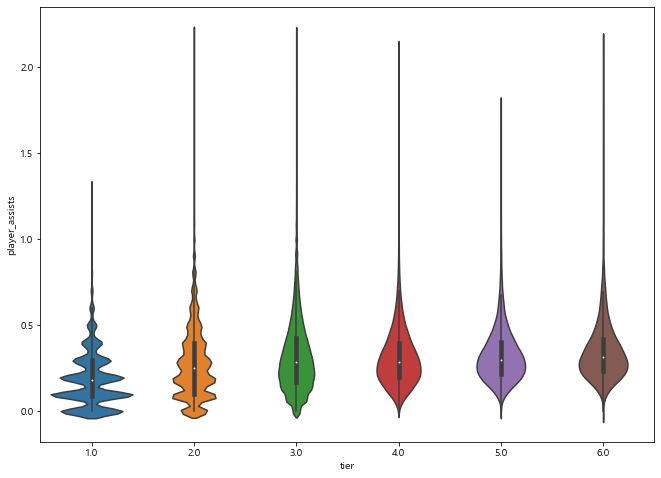

In [40]:
plt.figure(figsize=(11,8))
sns.violinplot(data=df, x='tier', y='player_assists')

# player_dbno

## 정규성

In [41]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_dbno'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_dbno'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_dbno'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_dbno'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_dbno'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_dbno'], dist='norm')
print( 'tier1', tier1[1][2], '\n', 'tier2', tier2[1][2], '\n', 'tier3', tier3[1][2], '\n',
      'tier4', tier4[1][2], '\n', 'tier5', tier5[1][2], '\n', 'tier6', tier6[1][2], '\n')

tier1 0.787 
 tier2 0.787 
 tier3 0.787 
 tier4 0.787 
 tier5 0.787 
 tier6 0.786 



## 등분산성

In [42]:
stats.levene(df.loc[df['tier'] == 1, 'player_dbno'],
             df.loc[df['tier'] == 2, 'player_dbno'],
             df.loc[df['tier'] == 3, 'player_dbno'],
             df.loc[df['tier'] == 4, 'player_dbno'],
             df.loc[df['tier'] == 5, 'player_dbno'],
             df.loc[df['tier'] == 6, 'player_dbno'])

LeveneResult(statistic=994.2405571326194, pvalue=0.0)

## anova

In [43]:
pg.welch_anova(dv = 'player_dbno', between = 'tier', data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,tier,5,44718.275506,5340.068487,0.000000,0.027916


## kruskal

In [44]:
tier1 = df.loc[df['tier'] == 1, 'player_dbno'] 
tier2 = df.loc[df['tier'] == 2, 'player_dbno'] 
tier3 = df.loc[df['tier'] == 3, 'player_dbno'] 
tier4 = df.loc[df['tier'] == 4, 'player_dbno'] 
tier5 = df.loc[df['tier'] == 5, 'player_dbno'] 
tier6 = df.loc[df['tier'] == 6, 'player_dbno'] 
stats.kruskal(tier1, tier2, tier3, tier4, tier5, tier6)

KruskalResult(statistic=19560.06606218826, pvalue=0.0)

## 사후분석

In [45]:
sp.posthoc_conover(df, val_col ='player_dbno',
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## plots

<AxesSubplot:xlabel='player_dbno', ylabel='Density'>

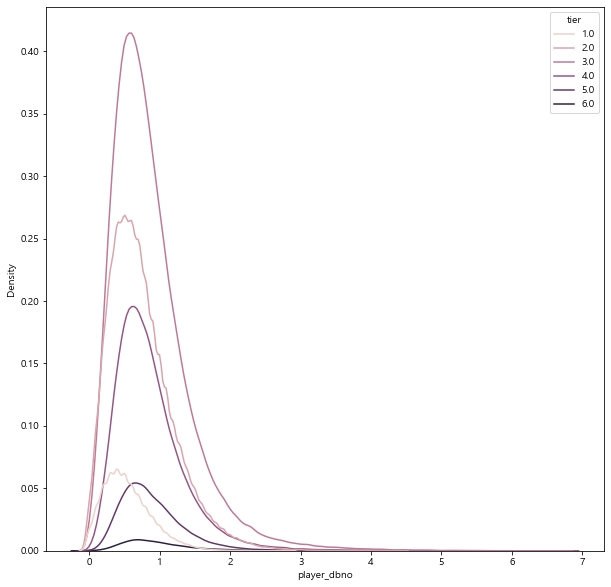

In [46]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=df, x='player_dbno', hue='tier')  #, shade=True

<AxesSubplot:xlabel='tier', ylabel='player_dbno'>

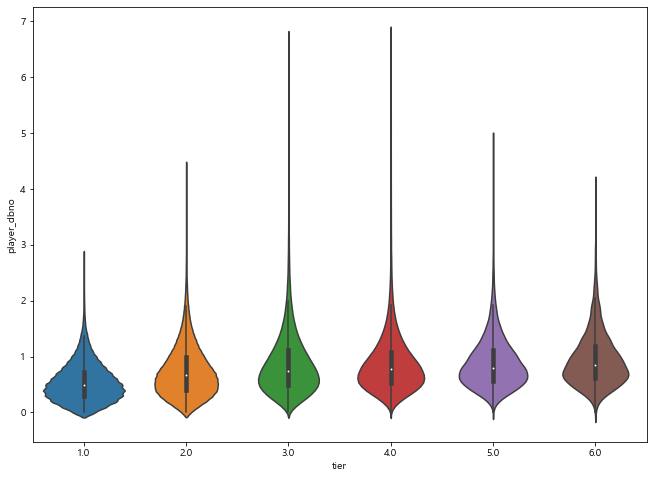

In [47]:
plt.figure(figsize=(11,8))
sns.violinplot(data=df, x='tier', y='player_dbno')

# KDA

## 정규성

In [48]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'kda'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'kda'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'kda'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'kda'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'kda'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'kda'], dist='norm')
print( 'tier1', tier1[1][2], '\n', 'tier2', tier2[1][2], '\n', 'tier3', tier3[1][2], '\n',
      'tier4', tier4[1][2], '\n', 'tier5', tier5[1][2], '\n', 'tier6', tier6[1][2], '\n')

tier1 0.787 
 tier2 0.787 
 tier3 0.787 
 tier4 0.787 
 tier5 0.787 
 tier6 0.786 



## 등분산성

In [49]:
stats.levene(df.loc[df['tier'] == 1, 'kda'],
             df.loc[df['tier'] == 2, 'kda'],
             df.loc[df['tier'] == 3, 'kda'],
             df.loc[df['tier'] == 4, 'kda'],
             df.loc[df['tier'] == 5, 'kda'],
             df.loc[df['tier'] == 6, 'kda'])

LeveneResult(statistic=1646.028199633977, pvalue=0.0)

## anova

In [50]:
pg.welch_anova(dv = 'kda', between = 'tier', data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,tier,5,44810.538369,10357.318936,0.000000,0.039345


## kruskal

In [51]:
tier1 = df.loc[df['tier'] == 1, 'kda'] 
tier2 = df.loc[df['tier'] == 2, 'kda'] 
tier3 = df.loc[df['tier'] == 3, 'kda'] 
tier4 = df.loc[df['tier'] == 4, 'kda'] 
tier5 = df.loc[df['tier'] == 5, 'kda'] 
tier6 = df.loc[df['tier'] == 6, 'kda'] 
stats.kruskal(tier1, tier2, tier3, tier4, tier5, tier6)

KruskalResult(statistic=30235.11927591716, pvalue=0.0)

## 사후분석

In [52]:
sp.posthoc_conover(df, val_col ='kda',
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## plots

<AxesSubplot:xlabel='kda', ylabel='Density'>

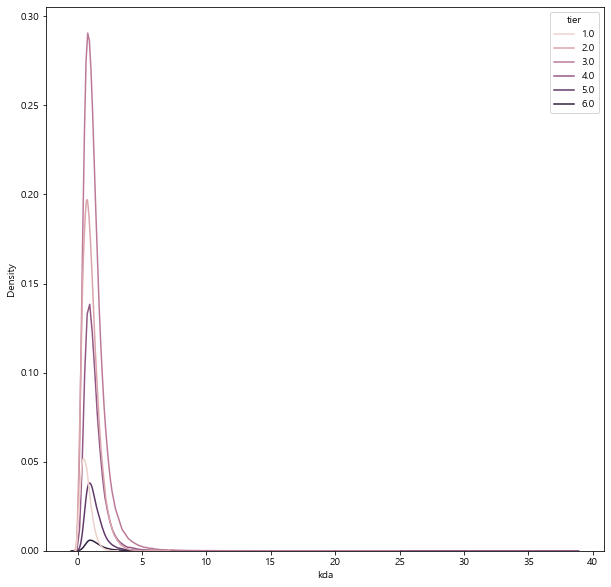

In [53]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=df, x='kda', hue='tier')  #, shade=True

<AxesSubplot:xlabel='tier', ylabel='kda'>

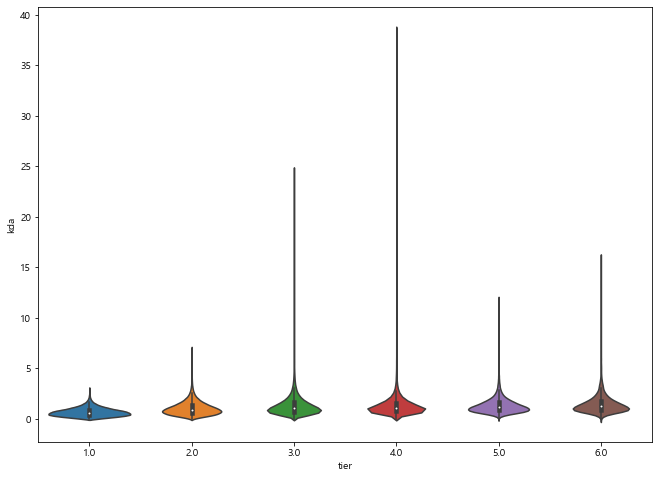

In [54]:
plt.figure(figsize=(11,8))
sns.violinplot(data=df, x='tier', y='kda')

# kill_dist

In [55]:
df['kill_dist'] = df['kill_dist'].fillna(0)

## 정규성

In [56]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'kill_dist'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'kill_dist'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'kill_dist'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'kill_dist'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'kill_dist'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'kill_dist'], dist='norm')
print( 'tier1', tier1[1][2], '\n', 'tier2', tier2[1][2], '\n', 'tier3', tier3[1][2], '\n',
      'tier4', tier4[1][2], '\n', 'tier5', tier5[1][2], '\n', 'tier6', tier6[1][2], '\n')

tier1 0.787 
 tier2 0.787 
 tier3 0.787 
 tier4 0.787 
 tier5 0.787 
 tier6 0.786 



## 등분산성

In [57]:
stats.levene(df.loc[df['tier'] == 1, 'kill_dist'],
             df.loc[df['tier'] == 2, 'kill_dist'],
             df.loc[df['tier'] == 3, 'kill_dist'],
             df.loc[df['tier'] == 4, 'kill_dist'],
             df.loc[df['tier'] == 5, 'kill_dist'],
             df.loc[df['tier'] == 6, 'kill_dist'])

LeveneResult(statistic=157.29248770771827, pvalue=1.271583919038462e-167)

## anova

In [58]:
pg.welch_anova(dv = 'kill_dist', between = 'tier', data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,tier,5,48723.763286,61.202888,0.000000,0.000607


## kruskal

In [59]:
tier1 = df.loc[df['tier'] == 1, 'kill_dist'] 
tier2 = df.loc[df['tier'] == 2, 'kill_dist'] 
tier3 = df.loc[df['tier'] == 3, 'kill_dist'] 
tier4 = df.loc[df['tier'] == 4, 'kill_dist'] 
tier5 = df.loc[df['tier'] == 5, 'kill_dist'] 
tier6 = df.loc[df['tier'] == 6, 'kill_dist'] 
stats.kruskal(tier1, tier2, tier3, tier4, tier5, tier6)

KruskalResult(statistic=27137.806297147352, pvalue=0.0)

## 사후분석

In [60]:
sp.posthoc_conover(df, val_col ='kill_dist',
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## plots

<AxesSubplot:xlabel='kill_dist', ylabel='Density'>

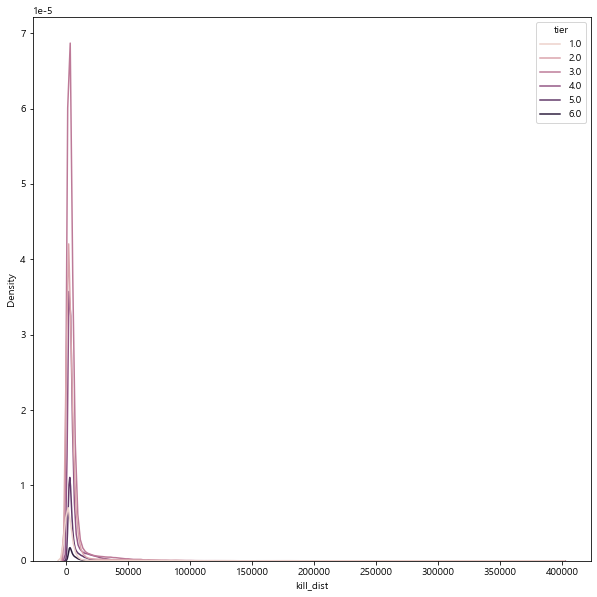

In [61]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=df, x='kill_dist', hue='tier')  #, shade=True

<AxesSubplot:xlabel='tier', ylabel='kill_dist'>

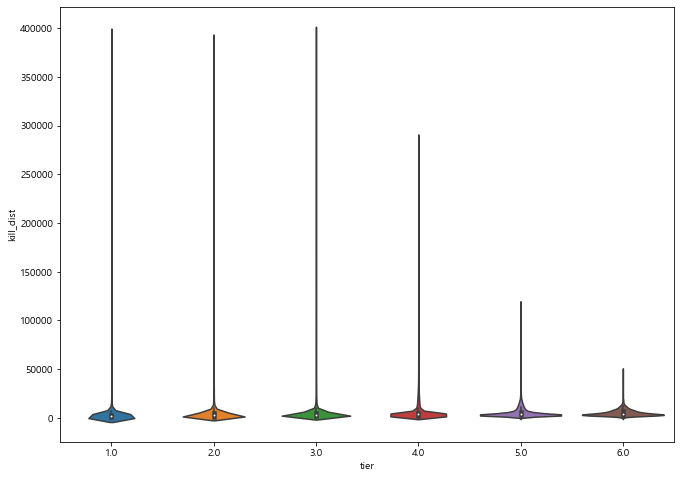

In [62]:
plt.figure(figsize=(11,8))
sns.violinplot(data=df, x='tier', y='kill_dist')

# player_dist_walk

## 정규성

In [63]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_dist_walk'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_dist_walk'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_dist_walk'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_dist_walk'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_dist_walk'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_dist_walk'], dist='norm')
print( 'tier1', tier1[1][2], '\n', 'tier2', tier2[1][2], '\n', 'tier3', tier3[1][2], '\n',
      'tier4', tier4[1][2], '\n', 'tier5', tier5[1][2], '\n', 'tier6', tier6[1][2], '\n')

tier1 0.787 
 tier2 0.787 
 tier3 0.787 
 tier4 0.787 
 tier5 0.787 
 tier6 0.786 



## 등분산성

In [64]:
stats.levene(df.loc[df['tier'] == 1, 'player_dist_walk'],
             df.loc[df['tier'] == 2, 'player_dist_walk'],
             df.loc[df['tier'] == 3, 'player_dist_walk'],
             df.loc[df['tier'] == 4, 'player_dist_walk'],
             df.loc[df['tier'] == 5, 'player_dist_walk'],
             df.loc[df['tier'] == 6, 'player_dist_walk'])

LeveneResult(statistic=113.35540113400384, pvalue=3.478897686887727e-120)

## anova

In [65]:
pg.welch_anova(dv = 'player_dist_walk', between = 'tier', data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,tier,5,46315.422507,976.681170,0.000000,0.010230


## kruskal

In [66]:
tier1 = df.loc[df['tier'] == 1, 'player_dist_walk'] 
tier2 = df.loc[df['tier'] == 2, 'player_dist_walk'] 
tier3 = df.loc[df['tier'] == 3, 'player_dist_walk'] 
tier4 = df.loc[df['tier'] == 4, 'player_dist_walk'] 
tier5 = df.loc[df['tier'] == 5, 'player_dist_walk'] 
tier6 = df.loc[df['tier'] == 6, 'player_dist_walk'] 
stats.kruskal(tier1, tier2, tier3, tier4, tier5, tier6)

KruskalResult(statistic=38664.55313427665, pvalue=0.0)

## 사후분석

In [67]:
sp.posthoc_conover(df, val_col ='player_dist_walk',
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.074816
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.081681
6.0,0.000000,0.000000,0.000000,0.074816,0.081681,1.000000


## plots

<AxesSubplot:xlabel='player_dist_walk', ylabel='Density'>

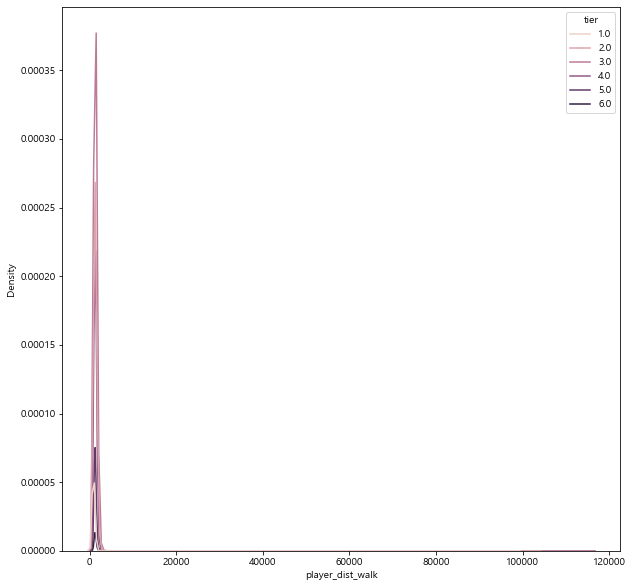

In [68]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=df, x='player_dist_walk', hue='tier')  #, shade=True

<AxesSubplot:xlabel='tier', ylabel='player_dist_walk'>

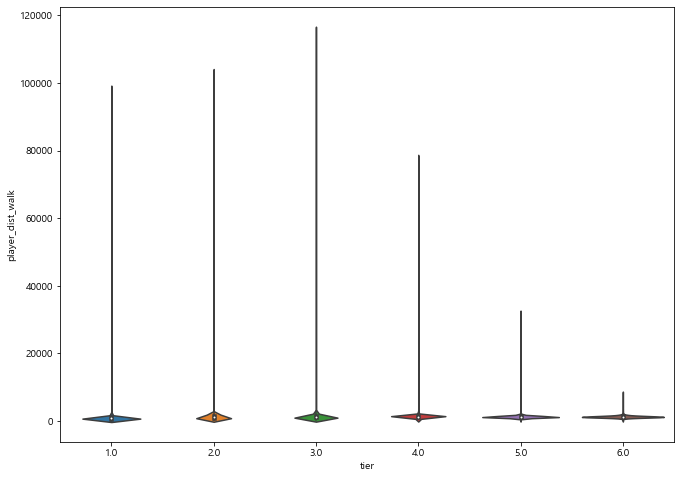

In [69]:
plt.figure(figsize=(11,8))
sns.violinplot(data=df, x='tier', y='player_dist_walk')

# player_dist_ride

## 정규성

In [70]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_dist_ride'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_dist_ride'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_dist_ride'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_dist_ride'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_dist_ride'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_dist_ride'], dist='norm')
print( 'tier1', tier1[1][2], '\n', 'tier2', tier2[1][2], '\n', 'tier3', tier3[1][2], '\n',
      'tier4', tier4[1][2], '\n', 'tier5', tier5[1][2], '\n', 'tier6', tier6[1][2], '\n')

tier1 0.787 
 tier2 0.787 
 tier3 0.787 
 tier4 0.787 
 tier5 0.787 
 tier6 0.786 



## 등분산성

In [71]:
stats.levene(df.loc[df['tier'] == 1, 'player_dist_ride'],
             df.loc[df['tier'] == 2, 'player_dist_ride'],
             df.loc[df['tier'] == 3, 'player_dist_ride'],
             df.loc[df['tier'] == 4, 'player_dist_ride'],
             df.loc[df['tier'] == 5, 'player_dist_ride'],
             df.loc[df['tier'] == 6, 'player_dist_ride'])

LeveneResult(statistic=1019.5962339877519, pvalue=0.0)

## anova

In [72]:
pg.welch_anova(dv = 'player_dist_ride', between = 'tier', data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,tier,5,44456.646708,5966.050269,0.000000,0.035441


## kruskal

In [73]:
tier1 = df.loc[df['tier'] == 1, 'player_dist_ride'] 
tier2 = df.loc[df['tier'] == 2, 'player_dist_ride'] 
tier3 = df.loc[df['tier'] == 3, 'player_dist_ride'] 
tier4 = df.loc[df['tier'] == 4, 'player_dist_ride'] 
tier5 = df.loc[df['tier'] == 5, 'player_dist_ride'] 
tier6 = df.loc[df['tier'] == 6, 'player_dist_ride'] 
stats.kruskal(tier1, tier2, tier3, tier4, tier5, tier6)

KruskalResult(statistic=25878.811006052172, pvalue=0.0)

## 사후분석

In [74]:
sp.posthoc_conover(df, val_col ='player_dist_ride',
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.297661,0.709008
4.0,0.000000,0.000000,0.000000,1.000000,0.000001,0.040094
5.0,0.000000,0.000000,0.297661,0.000001,1.000000,0.840205
6.0,0.000000,0.000000,0.709008,0.040094,0.840205,1.000000


## plots

<AxesSubplot:xlabel='player_dist_ride', ylabel='Density'>

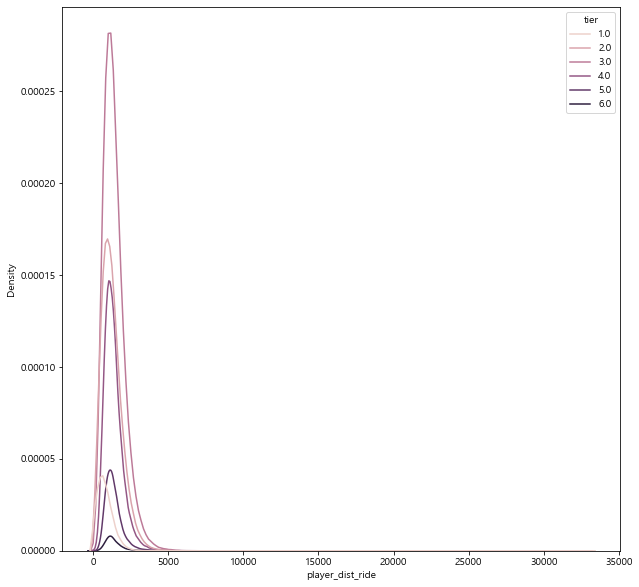

In [75]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=df, x='player_dist_ride', hue='tier')  #, shade=True

<AxesSubplot:xlabel='tier', ylabel='player_dist_ride'>

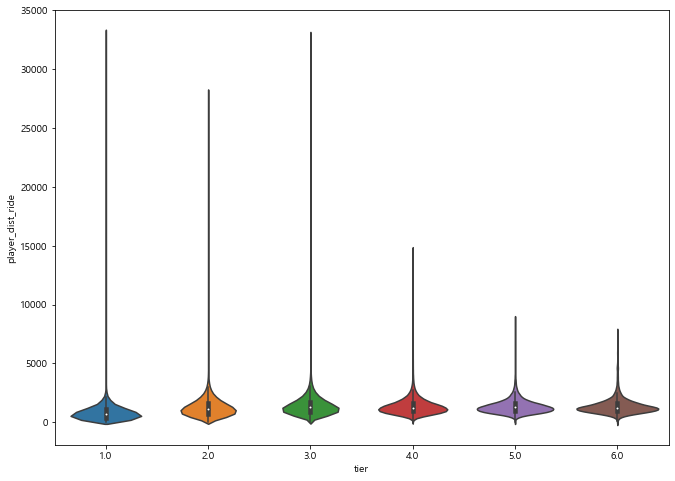

In [76]:
plt.figure(figsize=(11,8))
sns.violinplot(data=df, x='tier', y='player_dist_ride')

# player_survive_time

## 정규성

In [77]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_survive_time'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_survive_time'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_survive_time'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_survive_time'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_survive_time'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_survive_time'], dist='norm')
print( 'tier1', tier1[1][2], '\n', 'tier2', tier2[1][2], '\n', 'tier3', tier3[1][2], '\n',
      'tier4', tier4[1][2], '\n', 'tier5', tier5[1][2], '\n', 'tier6', tier6[1][2], '\n')

tier1 0.787 
 tier2 0.787 
 tier3 0.787 
 tier4 0.787 
 tier5 0.787 
 tier6 0.786 



## 등분산성

In [78]:
stats.levene(df.loc[df['tier'] == 1, 'player_survive_time'],
             df.loc[df['tier'] == 2, 'player_survive_time'],
             df.loc[df['tier'] == 3, 'player_survive_time'],
             df.loc[df['tier'] == 4, 'player_survive_time'],
             df.loc[df['tier'] == 5, 'player_survive_time'],
             df.loc[df['tier'] == 6, 'player_survive_time'])

LeveneResult(statistic=1624.226963038909, pvalue=0.0)

## anova

In [79]:
pg.welch_anova(dv = 'player_survive_time', between = 'tier', data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,tier,5,44657.390350,15730.817182,0.000000,0.086213


## kruskal

In [80]:
tier1 = df.loc[df['tier'] == 1, 'player_survive_time'] 
tier2 = df.loc[df['tier'] == 2, 'player_survive_time'] 
tier3 = df.loc[df['tier'] == 3, 'player_survive_time'] 
tier4 = df.loc[df['tier'] == 4, 'player_survive_time'] 
tier5 = df.loc[df['tier'] == 5, 'player_survive_time'] 
tier6 = df.loc[df['tier'] == 6, 'player_survive_time'] 
stats.kruskal(tier1, tier2, tier3, tier4, tier5, tier6)

KruskalResult(statistic=46378.85490297134, pvalue=0.0)

## 사후분석

In [81]:
sp.posthoc_conover(df, val_col ='player_survive_time',
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.010851,0.304706
5.0,0.000000,0.000000,0.000000,0.010851,1.000000,0.052996
6.0,0.000000,0.000000,0.000000,0.304706,0.052996,1.000000


## plots

<AxesSubplot:xlabel='player_survive_time', ylabel='Density'>

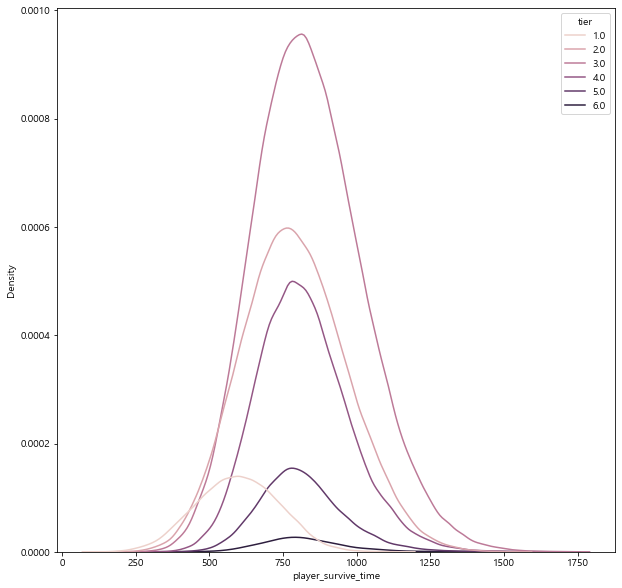

In [82]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=df, x='player_survive_time', hue='tier')  #, shade=True

<AxesSubplot:xlabel='tier', ylabel='player_survive_time'>

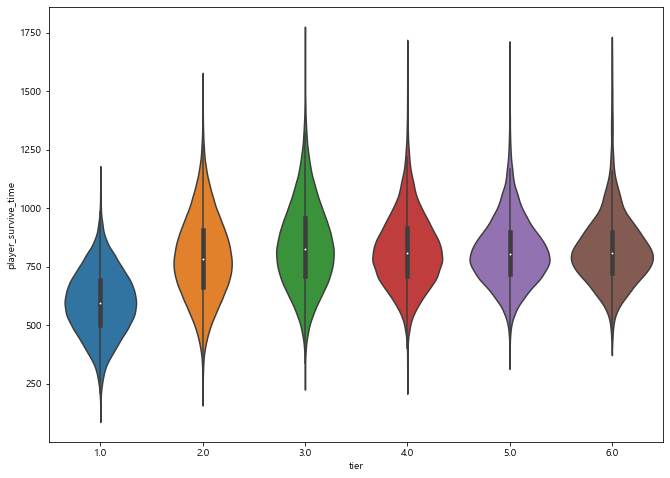

In [83]:
plt.figure(figsize=(11,8))
sns.violinplot(data=df, x='tier', y='player_survive_time')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591865 entries, 0 to 591864
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_kills         591865 non-null  float64
 1   player_dmg           591865 non-null  float64
 2   player_assists       591865 non-null  float64
 3   player_dbno          591865 non-null  float64
 4   kda                  591865 non-null  float64
 5   player_dist_walk     591865 non-null  float64
 6   player_dist_ride     591865 non-null  float64
 7   kill_dist            591865 non-null  float64
 8   player_survive_time  591865 non-null  float64
 9   team_placement       591865 non-null  float64
 10  num_of_match         591865 non-null  float64
 11  tier                 591865 non-null  float64
dtypes: float64(12)
memory usage: 54.2 MB
